훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.951
특성 중요도: 
 [0.         0.01851365 0.         0.01644011 0.00645669 0.00539652
 0.00322944 0.02594296 0.0020411  0.00624214 0.01038144 0.04713929
 0.00896364 0.00760958 0.00681073 0.0055972  0.0141338  0.00363771
 0.0021991  0.00652204 0.36495075 0.01551872 0.2609708  0.02856098
 0.01360245 0.01130158 0.0165101  0.08242718 0.00376913 0.00513106]


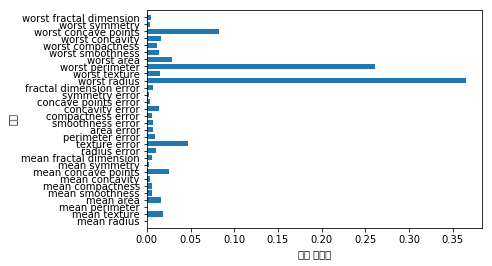

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)

model = XGBClassifier(random_state=0)

model.fit(x_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(model.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(x_test, y_test)))

print("특성 중요도: \n", model.feature_importances_)

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(model)
plt.show()